<a href="https://colab.research.google.com/github/Chanunchida-May/multivariate/blob/main/chapter4MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multidimensional Scaling

In [ ]:
import pandas as pd

In [ ]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## ลอง plot PCA เพื่อเปรียบเทียบ วิธีMDS







In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [ ]:
from matplotlib import pyplot as plt

###MSD (Multidimensional Scaling)

##Distance

In [ ]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [ ]:
import numpy as np

In [ ]:
dist = np.linalg.norm(X1-X2) #ระยะห่างระหว่าง2จุด
dist

0.5385164807134502

##Distance Matrix

In [ ]:
from sklearn.metrics import  pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

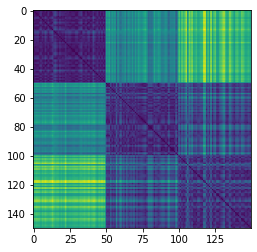

In [ ]:
plt.imshow(dis_matrix) #ภาพเเต่ละจุดในmatrixที่มาplotกราฟ ถ้ามีสีเข้มคือมีระยะห่างน้อย ถ้าสีสว่างคือระยะห่างที่มีค่ามาก

###ทำ MDS  

In [ ]:
from sklearn.manifold import  MDS

In [ ]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

###การใช้ Pre-computed Distance Matrix

In [ ]:
msd = MDS(n_components=2,dissimilarity='precomputed')

###Example 2
https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]  #Nคือจำนวนจุด

In [4]:
X = make_hello(1000)

In [6]:
X.shape #จุดของXเเละY

(1000, 2)

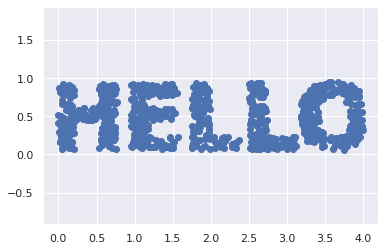

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal'); #ทำให้สเกลของเเต่ละเเกนเท่ากัน 

In [10]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

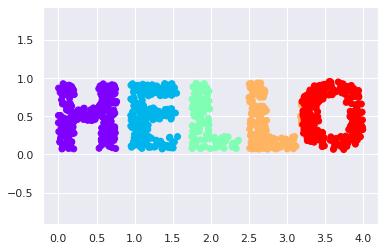

In [11]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [13]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R) #หมุนจุด

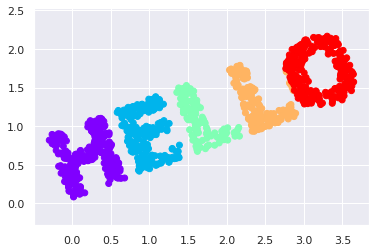

In [14]:
X2 = rotate(X, 20) 
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

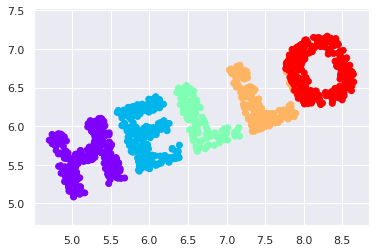

In [15]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

##MDS  

In [17]:
from sklearn.metrics import pairwise_distances

In [18]:
D = pairwise_distances(X)
D.shape

(1000, 1000)

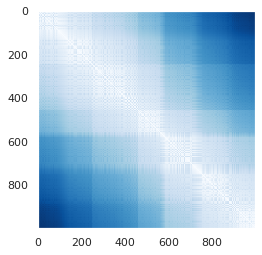

In [21]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest') 

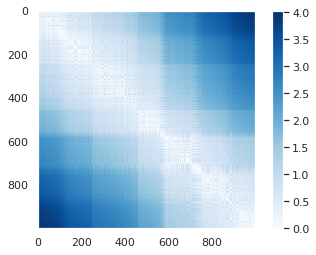

In [22]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [23]:
D2 = pairwise_distances(X2)

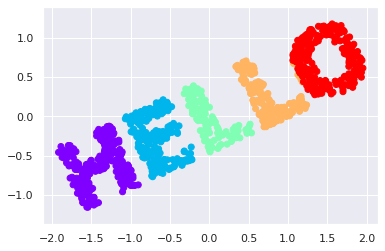

In [26]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) #randomสามารถกำหนดได้ว่าตัวไหนเป็นช้อยเดียวกัน จะได้ผลลัพธ์หน้าตาเหมือนกัน
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

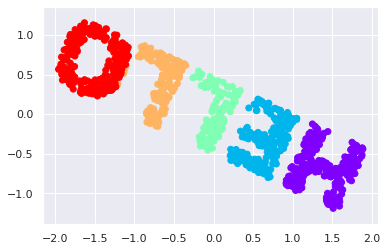

In [28]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### ทดลองทำ PCA กับข้อมูล ```X``` เเล้ว plotgraph เเละดูผลว่าการกระจายของข้อมูลเปลี่ยนไปหรือไม่ อย่างไร 
ส่งก่อน 14.15 commit ว่า quiz4

In [30]:
from sklearn.decomposition import PCA